In [5]:
import numpy as np, pandas as pd, sklearn as sl
import pylab as pl, matplotlib as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.datasets import make_regression

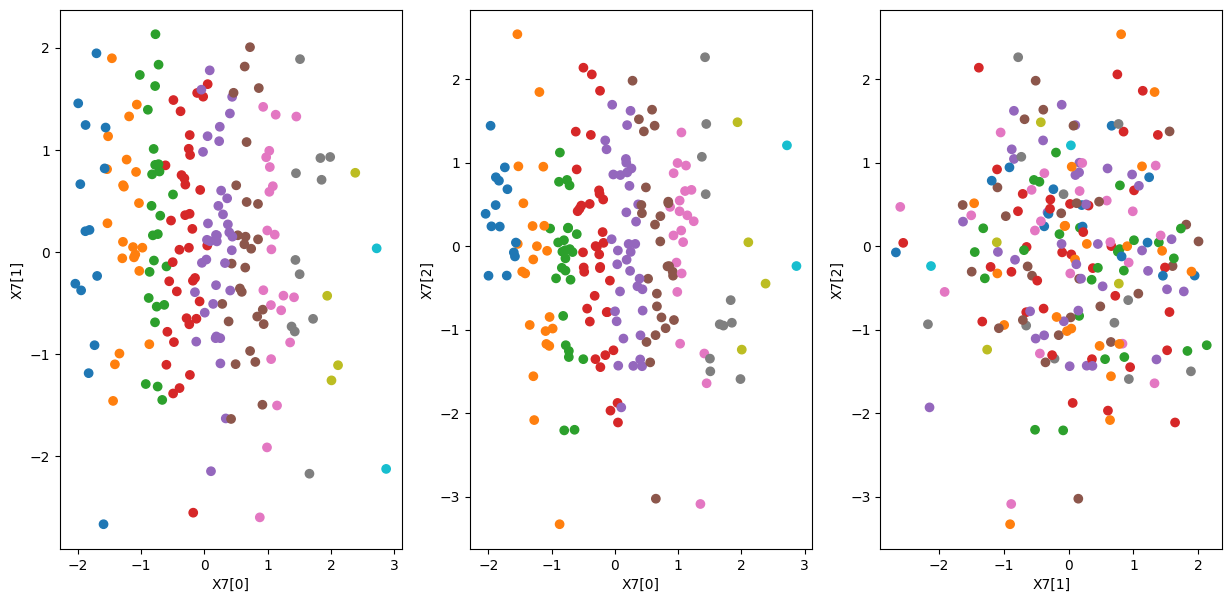

In [6]:
# 25000x3 матрица, 3 переменных (2 значимые для целевой), 
# 1 целевая, 0.97 - фактор предвзятости
[X7,y7]=make_regression(n_samples=25000,n_features=3,
                        n_informative=2,n_targets=1,
                        bias=0.97)
f,ax=pl.subplots(ncols=3,figsize=(15,7)); k=[[0,1],[0,2],[1,2]]
[ax[i].scatter(X7[:200,k[i][0]], X7[:200,k[i][1]],c=y7[:200],
               cmap=pl.cm.tab10) for i in range(3)]
[ax[i].set_xlabel('X7[%d]'%k[i][0]) for i in range(3)]
[ax[i].set_ylabel('X7[%d]'%k[i][1]) for i in range(3)]
pl.show()
# 5000x10 матрица, 10 переменных (8 - значимые для целевой), 
# 2 целевые, 0.7 - фактор предвзятости, 10.0 - "шум"
[X8,y8]=make_regression(n_samples=5000,n_features=10,
                        n_informative=8,n_targets=2,
                        bias=0.7,noise=10.0)

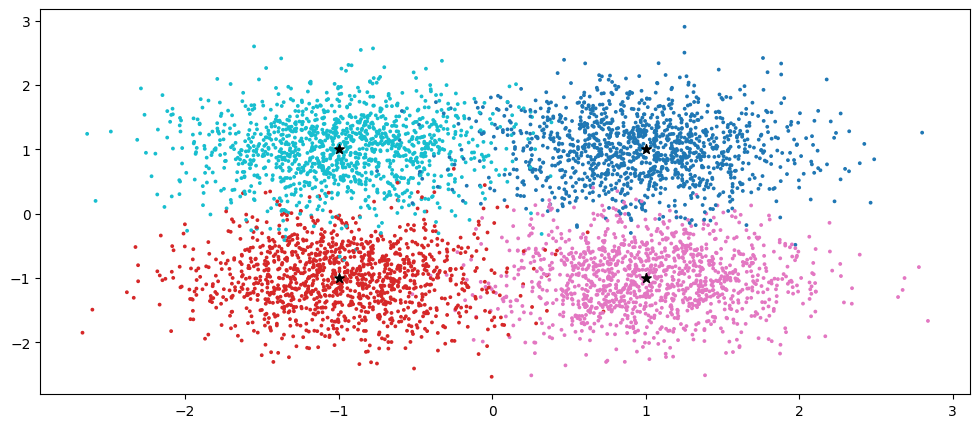

In [7]:
from sklearn.datasets import make_blobs
# Gaussian blobs for clustering, 5000 data points, 4 clusters
[X9,y9]=make_blobs(
    n_samples=5000,centers=[[1,1],[-1,-1],[1,-1],[-1,1]],cluster_std=0.5)
pl.figure(figsize=(12,5))
pl.scatter(X9[:,0],X9[:,1],c=y9,cmap=pl.cm.tab10,s=3)
pl.scatter([1,-1,1,-1],[1,-1,-1,1],c='black',marker='*',s=50)

In [9]:
import sklearn.datasets as skd
housing=skd.fetch_california_housing()
digits=skd.load_digits(); wine=skd.load_wine()
faces=skd.fetch_olivetti_faces()
[X2,y2,X3,y3,X4,y4,X5,y5]=\
[housing.data,housing.target,digits.data,digits.target,
wine.data,wine.target,faces.data,faces.target]

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\mrmar\scikit_learn_data


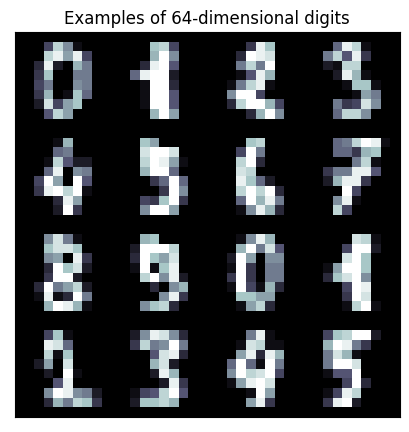

In [10]:
n=4; img=np.zeros((10*n,10*n))
for i in range(n): 
    for j in range(n): 
      img[(10*i+1):(10*i+9),(10*j+1):(10*j+9)]=X3[i*n+j].reshape((8,8))
pl.figure(figsize=(5,5)); pl.imshow(img,cmap=pl.cm.bone)
pl.title('Examples of 64-dimensional digits')
pl.xticks([]); pl.yticks([]); pl.show()

In [11]:
train=skd.fetch_20newsgroups(subset='train',shuffle=True,
                                  remove=('headers','footers','quotes'))
test=skd.fetch_20newsgroups(subset='test',shuffle=True,
                                 remove=('headers','footers','quotes'))

In [12]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=3, random_state=0)
# разбивка: обучение - контроль
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
random_state=0)
from sklearn.ensemble import GradientBoostingRegressor
regres = GradientBoostingRegressor ()
regres.fit(X_train, y_train)
prediction = regres.predict(X_test)
print (np.mean(prediction == y_test))
print (regres.score(X_test, y_test)) # более удобная
print (regres.score(X_train, y_train))

0.0
0.5884025391861716
0.9999443943076577


In [26]:
def sas(X,y): 
    return tts(X,y,test_size=0.2,random_state=1)

In [27]:
Xy=[sas(X2,y2),sas(X3,y3),sas(X4,y4),sas(X5,y5)]
[[X_train2,X_test2,y_train2,y_test2],
 [X_train3,X_test3,y_train3,y_test3],
 [X_train4,X_test4,y_train4,y_test4],
 [X_train5,X_test5,y_train5,y_test5]]=Xy
[print([Xy[i][j].shape for j in range(4)]) for i in range(4)]
print('housing, digits, wine, faces')

[(16512, 8), (4128, 8), (16512,), (4128,)]
[(1437, 64), (360, 64), (1437,), (360,)]
[(142, 13), (36, 13), (142,), (36,)]
[(320, 4096), (80, 4096), (320,), (80,)]
housing, digits, wine, faces


In [36]:
Xy2=[sas(X7,y7),sas(X8,y8),sas(X9,y9),sas(X10,y10)]
[[X_train7,X_test7,y_train7,y_test7],
 [X_train8,X_test8,y_train8,y_test8],
 [X_train9,X_test9,y_train9,y_test9],
 [X_train10,X_test10,y_train10,y_test10]]=Xy2
[print([Xy2[i][j].shape for j in range(4)]) for i in range(4)]
print('toy datasets: regression, regression 2, blobs, classification')

NameError: name 'X10' is not defined

In [13]:
from sklearn.metrics import mean_squared_error,median_absolute_error,\
mean_absolute_error,r2_score,explained_variance_score
from sklearn.metrics import accuracy_score,hamming_loss,classification_report

In [14]:
from sklearn import cluster,mixture,manifold,dummy,linear_model,svm
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier,\
DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,\
AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,\
AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor,RadiusNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier,\
NearestCentroid
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,\
QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.kernel_ridge import KernelRidge
from sklearn.cross_decomposition import PLSRegression
from sklearn.gaussian_process import GaussianProcessRegressor,\
GaussianProcessClassifier
from sklearn.gaussian_process.kernels import WhiteKernel,RationalQuadratic,RBF
from sklearn.semi_supervised import LabelPropagation,LabelSpreading
from sklearn.isotonic import IsotonicRegression
from sklearn.neural_network import MLPClassifier,BernoulliRBM,MLPRegressor

In [15]:
classifier_list,classifier_names,clf_datasets=[],[],[]
acc_train,acc_test,loss_train,loss_test=[],[],[],[]
df_list=['classifier_name','acc_train','acc_test','loss_train','loss_test']

In [16]:
def classifier_fit_score(classifier,classifier_name,
                         clf_dataset,x_train,x_test,y_train,y_test):
    classifier.fit(x_train,y_train)
    clf_datasets.append(clf_dataset)
    classifier_list.append(str(classifier))
    classifier_names.append(classifier_name)    
    y_clf_train=classifier.predict(x_train)
    y_clf_test=classifier.predict(x_test)        
    acc_clf_train=round(accuracy_score(y_train,y_clf_train),4)
    acc_clf_test=round(accuracy_score(y_test,y_clf_test),4)
    acc_train.append(acc_clf_train); acc_test.append(acc_clf_test)   
    loss_clf_train=round(hamming_loss(y_train,y_clf_train),4)
    loss_clf_test=round(hamming_loss(y_test,y_clf_test),4)
    loss_train.append(loss_clf_train); loss_test.append(loss_clf_test)    
    return [y_clf_train,y_clf_test,acc_clf_train,
            acc_clf_test,loss_clf_train,loss_clf_test]
def get_classifier_results():
    return pd.DataFrame({'classifier':classifier_list,
                         'classifier_name':classifier_names,
                         'clf_dataset':clf_datasets,
                         'acc_train':acc_train,'acc_test':acc_test,
                         'loss_train':loss_train,'loss_test':loss_test})

In [17]:
clf=[linear_model.LogisticRegression(solver='liblinear',multi_class='ovr'),
     linear_model.LogisticRegressionCV(solver='liblinear',multi_class='ovr'),
     linear_model.SGDClassifier(max_iter=1000,tol=0.00001),
     linear_model.RidgeClassifier(),linear_model.RidgeClassifierCV(),
     LinearDiscriminantAnalysis(),QuadraticDiscriminantAnalysis(),
     svm.LinearSVC(),svm.SVC(gamma='scale',C=10.0,kernel='poly'),
     svm.NuSVC(gamma='scale',kernel='poly'),
     KNeighborsClassifier(),RadiusNeighborsClassifier(radius=30),
     NearestCentroid(),
     DecisionTreeClassifier(),ExtraTreeClassifier(),GaussianNB(),
     BernoulliNB(),MultinomialNB(),
     BaggingClassifier(),RandomForestClassifier(n_estimators=64),
     AdaBoostClassifier(),GradientBoostingClassifier(),
     linear_model.Perceptron(max_iter=1000,tol=0.00001),
     linear_model.PassiveAggressiveClassifier(max_iter=1000,tol=0.00001),
     GaussianProcessClassifier(),LabelPropagation(),LabelSpreading()]

In [35]:
list3clf=['LogisticRegression','LogisticRegressionCV','SGDClassifier',
          'RidgeClassifier', 'RidgeClassifierCV',
          'LinearDiscriminantAnalysis','QuadraticDiscriminantAnalysis',
          'LinearSVC', 'SVC','NuSVC',
          'KNeighborsClassifier','RadiusNeighborsClassifier','NearestCentroid', 
          'DecisionTreeClassifier','ExtraTreeClassifier',
          'GaussianNB','BernoulliNB','MultinomialNB',
          'BaggingClassifier','RandomForestClassifier',
          'AdaBoostClassifier','GradientBoostingClassifier',
          'Perceptron','PassiveAggressiveClassifier']
y3clf=[]
for i in range(len(list3clf)):
    y3clf.append(classifier_fit_score(clf[i],list3clf[i],'Digits',
                                      X_train3,X_test3,y_train3,y_test3)[:2])
[[y_train31,y_test31],[y_train32,y_test32],
 [y_train33,y_test33],[y_train34,y_test34],[y_train35,y_test35],
[y_train36,y_test36],[y_train37,y_test37],[y_train38,y_test38],
 [y_train39,y_test39],[y_train310,y_test310],
[y_train311,y_test311],[y_train312,y_test312],
 [y_train313,y_test313],[y_train314,y_test314],[y_train315,y_test315],
[y_train316,y_test316],[y_train317,y_test317],[y_train318,y_test318],
 [y_train319,y_test319],[y_train320,y_test320],
[y_train321,y_test321],[y_train322,y_test322],[y_train323,y_test323],
 [y_train324,y_test324]]=y3clf
y_train925,y_test925=\
classifier_fit_score(clf[24],'GaussianProcessClassifier','Toy Blobs',
                     X_train9,X_test9,y_train9,y_test9)[:2]
y_train926,y_test926=\
classifier_fit_score(clf[25],'LabelPropagation','Toy Blobs',
                     X_train9,X_test9,y_train9,y_test9)[:2]
y_train927,y_test927=\
classifier_fit_score(clf[26],'LabelSpreading','Toy Blobs',
                     X_train9,X_test9,y_train9,y_test9)[:2]

g:\study\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
g:\study\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
g:\study\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


NameError: name 'X_train9' is not defined

In [34]:
df_classifier_results=get_classifier_results()
df_classifier_results.to_csv('classifier_results.csv')
df_classifier_results[df_list].sort_values('acc_test',ascending=False)

,classifier_name,acc_train,acc_test,loss_train,loss_test
11,RadiusNeighborsClassifier,0.9763,0.9944,0.0237,0.0056
10,KNeighborsClassifier,0.9882,0.9944,0.0118,0.0056
8,SVC,1.0000,0.9861,0.0000,0.0139
19,RandomForestClassifier,1.0000,0.9806,0.0000,0.0194
23,PassiveAggressiveClassifier,0.9777,0.9778,0.0223,0.0222
1,LogisticRegressionCV,0.9847,0.9722,0.0153,0.0278
7,LinearSVC,0.9930,0.9694,0.0070,0.0306
0,LogisticRegression,0.9965,0.9694,0.0035,0.0306
2,SGDClassifier,0.9777,0.9667,0.0223,0.0333
9,NuSVC,0.9631,0.9639,0.0369,0.0361


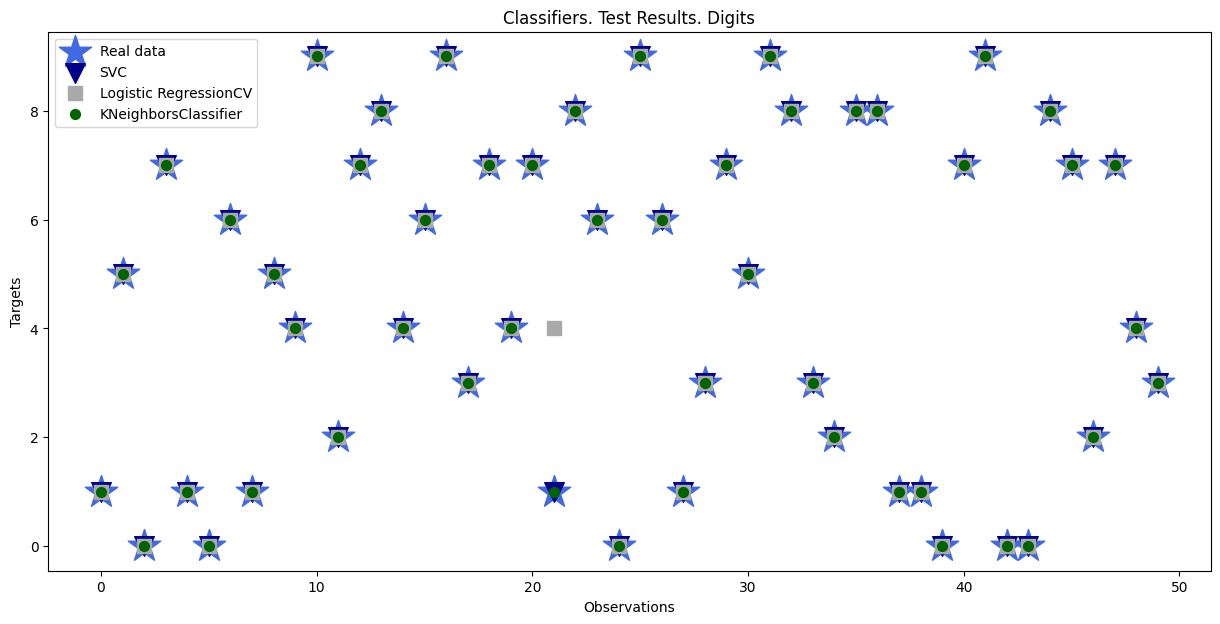

In [37]:
pl.figure(figsize=(15,7)); n=50; x=range(n)
pl.scatter(x,y_test3[:n],marker='*',s=600,
              color='royalblue',label='Real data')
pl.scatter(x,y_test39[:n],marker='v',s=200,
              color='darkblue',label='SVC')
pl.scatter(x,y_test32[:n],marker='s',s=100,
              color='darkgrey',label='Logistic RegressionCV')
pl.scatter(x,y_test311[:n],marker='o',s=50,
              color='darkgreen',label='KNeighborsClassifier')
pl.xlabel('Observations'); pl.ylabel('Targets')
pl.title('Classifiers. Test Results. Digits')
pl.legend(loc=2,fontsize=10); 

In [38]:
print(classification_report(y_test3,y_test32))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       1.00      0.94      0.97        35
           2       1.00      1.00      1.00        36
           3       1.00      0.98      0.99        41
           4       0.95      1.00      0.97        38
           5       0.91      1.00      0.95        30
           6       0.97      1.00      0.99        37
           7       1.00      0.95      0.97        37
           8       0.93      0.93      0.93        29
           9       0.94      0.94      0.94        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

